# 3. Analysis

## import relevant library

In [1]:
!pip install wordcloud
!pip install nltk
!pip install imageio
!pip install twython

import json
import matplotlib.pyplot as plt
from pylab import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import imageio
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is alre

True

In [2]:
# Calculate number of corresponding tweets for each month
def cal_month(month_string, sentiment_list):
    if month_string == "Jan":
        sentiment_list[0] += 1
    elif month_string == "Feb":
        sentiment_list[1] += 1
    elif month_string == "Mar":
        sentiment_list[2] += 1
    elif month_string == "Apr":
        sentiment_list[3] += 1
    elif month_string == "May":
        sentiment_list[4] += 1
    elif month_string == "Jun":
        sentiment_list[5] += 1
    elif month_string == "Jul":
        sentiment_list[6] += 1
    elif month_string == "Aug":
        sentiment_list[7] += 1
    elif month_string == "Sep":
        sentiment_list[8] += 1
    elif month_string == "Oct":
        sentiment_list[9] += 1
    elif month_string == "Nov":
        sentiment_list[10] += 1
    elif month_string == "Dec":
        sentiment_list[11] += 1

In [3]:
pos_month = [0,0,0,0,0,0,0,0,0,0,0,0]
neg_month = [0,0,0,0,0,0,0,0,0,0,0,0]
user = {}

with open("search_tweet.json") as f:
    for line in f:
        line = line.strip()
        if len(line) > 0:
            data = json.loads(line)
            # Classify each tweet into either positive or negative
            result = SentimentIntensityAnalyzer()
            res = result.polarity_scores(data["text"])
            month = data["created_at"][4:7]
            # Save posted tweets into file
            txt = data["text"]
            # Check whether tweets are reposted
            if txt[0:2] == "RT":
                txt = data["retweeted_status"]["text"]
            outf = open("tweet_text.txt", 'a+')
            outf.write(json.dumps(txt) + "\n")
            outf.close()
            
            if res["pos"] >= res["neg"]:  
                cal_month(month,pos_month)
            else: 
                cal_month(month,neg_month)
                # Calculate the number of tweets with negative sentiment for users
                uid = data["user"]["id"]
                uname = data["user"]["screen_name"]
                u = str(uname) + " [" + str(uid) + "]"
                if u in user:
                    value = user[u]
                    user[u] = value + 1
                else:
                    user[u] = 1
                    
# Sort the dictionary by value
user = sorted(user.items(), key=lambda item:item[1], reverse=True)

## (i) How the attitude towards women have been changed over time?

Simple analysis results: As can be seen from the figure, the relevant tweets (regardless of positive or negative) in April and October show an increasing trend, and overall, the number of negative tweets varies with the variety of the number of positive tweets.

**Note:** Because the number of twitters obtained is limited, the results of the analysis may change.

**Note:** Because the number of twitters obtained is limited, the figure about sentiment over time - yearly is not convincing.

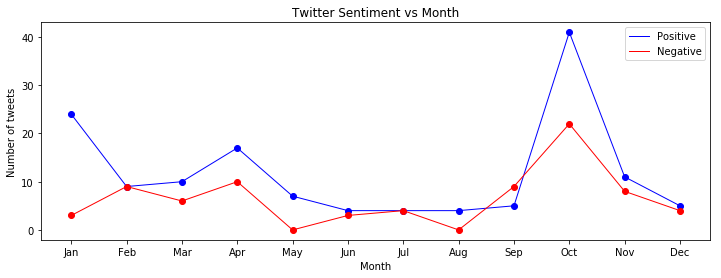

In [4]:
# Plot line chart 
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y1 = pos_month
y2 = neg_month
plt.figure(figsize=(12,4)) # Set the size of the line chart
plt.xticks(arange(len(x)),x) # Customize the x-axis
plt.plot(y1,color = "b", label="Positive", linewidth=1) # Plot points of positive
plt.plot(y1,'ob')

plt.plot(y2,color ="r", label="Negative", linewidth=1) # Plot points of negative
plt.plot(y2,'or')

plt.xlabel("Month") # label of x-axis
plt.ylabel("Number of tweets")  # label of y-axis
plt.title("Twitter Sentiment vs Month") # title of graph
plt.legend()
plt.show() 

## (ii) Who are the trollers? (Top 10)

Depending on the number of tweets with negative sentiment posted by the user.

In [5]:
# print top 10 trollers
print('\033[1m' + "Top 10 UserName [UserID]: ")
if len(user) < 10:
    for i in range(len(user)):    
        print('\033[0m' + str(user[i][0]))
else:
    for i in range(10):    
        print('\033[0m' + str(user[i][0]))

Top 10 UserName [UserID]: 
pAwanpalial [250126550]
CatherineDeveny [30380016]
Godsobey [15607564]
theremonstrator [436578992]
ashstreeterrrrr [1279777537]
Kate_ohalloran [418064386]
faithmeckley [1378240352]
bed42 [14196583]
DrDooleyMD [2917736960]
LordBromley [184267522]


## (iii) Word Cloud

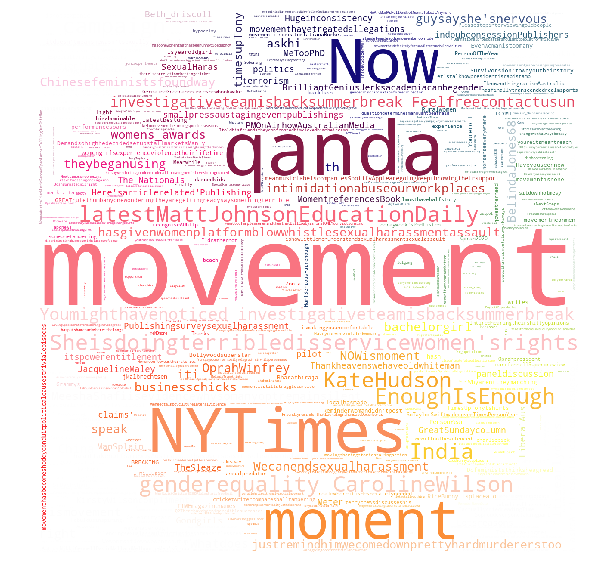

In [6]:
# Text cleaning
text = ""
with open("tweet_text.txt","rb") as f:
    for line in f:
        line = line.decode('unicode_escape').encode('ascii','ignore').strip().decode('utf-8')
        tokens = nltk.word_tokenize(line)
        tagged = nltk.pos_tag(tokens)
        tg = ["CC","CD","DT","IN","TO","''","FW"]
        for tag in tagged:
            if tag[0] == "https":
                break
            elif tag[1] in tg:
                pass
            elif tag[0].lower() == "metoo" or tag[0].lower() == "timesup":
                pass
            else:
                text = text + tag[0]

# Set the background picture
RGB_coloring = imageio.imread("RGB.png")
# Set relevant attributes for word cloud
wc = WordCloud(background_color="white",max_words=500,mask=RGB_coloring,stopwords=STOPWORDS.add("said"),max_font_size=500, random_state=42)
# Generate word cloud
wc.generate(text)

# Generate the image color from selected background picture
image_colors = ImageColorGenerator(RGB_coloring)

# Set figure size
plt.figure(figsize=(10,10))
# Recolor wordcloud and show
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.show()